In [44]:
import utils2
from utils2 import createfunct
from importlib import reload
from kan import KAN, create_dataset
import numpy as np
import matplotlib.pyplot as plt
import torch
reload(utils2)

<module 'utils2' from '/home/ronin/Dev/notebooks/kan/pykan/project/utils2.py'>

In [45]:
n = 2
c = 1
func_list = []
for i in range(30):
    try:
        random_func, sympy_expr = createfunct(n, c)
        func_list.append(random_func)
        print(f"function ({i}) : {sympy_expr}")
    except:
        pass
        #print(f"function ({i}) : BRUTTA")


function (1) : x0**2/x1**4
function (8) : x1**4 + x0**(-5)
function (24) : x0**3*x1**3
function (26) : x0**4/x1**5


In [46]:
func_list

[<function utils2.<lambda>(x)>,
 <function utils2.<lambda>(x)>,
 <function utils2.<lambda>(x)>,
 <function utils2.<lambda>(x)>]

In [47]:
f = func_list[0]
dataset_f = create_dataset(f, n_var=2, train_num=3000)

In [48]:
def autofit(input, output, dataset):
    losses = []
    iters = 5

    for i in range(iters):
        x = (iters - (i + 1)) * [5]
        width = [input, *x, output]
        model = KAN(width=width, 
                    grid=5, 
                    k=3, 
                    seed=0)
        
        a = model.fit(dataset, 
                      opt="LBFGS", 
                      steps=20,
                      lamb=0.001, 
                      lamb_entropy=2.)
        
        losses.append(a['train_loss'][-1])
    
    factor = np.array(list(range(iters,0,-1)))**2
    best_setup = np.argmin(factor * losses)
    x = (iters - (best_setup + 1)) * [5]
    best_width = [input, *x, output]

    print(f"best depth found = {len(x)}")
    
    best_model = KAN(width= best_width, 
                grid=10, 
                k=3, 
                seed=0)

    best_model.fit(dataset, 
                   opt="LBFGS", 
                   steps=20,
                   lamb=0.05,
                   lamb_entropy=2.5) 
                   #lamb=0.01, 
                   #lamb_entropy=2.)
    best_model = best_model.prune_node(threshold=1e-2)
    return best_model
        

train loss: 4.11e-01 | test loss: 4.22e-01 | reg: 1.86e+01 : 100%|██| 20/20 [00:23<00:00,  1.16s/it]
train loss: 4.05e-01 | test loss: 4.31e-01 | reg: 2.00e+01 : 100%|██| 20/20 [00:17<00:00,  1.16it/s]
train loss: 4.13e-01 | test loss: 4.21e-01 | reg: 1.50e+01 : 100%|██| 20/20 [00:12<00:00,  1.61it/s]
train loss: 4.16e-01 | test loss: 4.17e-01 | reg: 1.24e+01 : 100%|██| 20/20 [00:06<00:00,  3.22it/s]
train loss: 5.02e-01 | test loss: 5.00e-01 | reg: 2.91e+00 : 100%|██| 20/20 [00:00<00:00, 27.15it/s]


best depth found = 0


train loss: 5.82e-01 | test loss: 5.82e-01 | reg: 2.22e-02 : 100%|██| 20/20 [00:01<00:00, 16.57it/s]


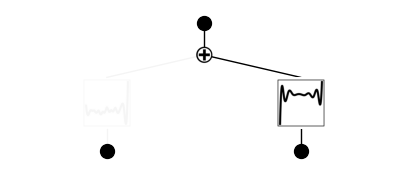

In [53]:
model = autofit(2,1,dataset_f)
model.plot(beta=10)

In [60]:
f_3 = lambda x: (( x[:, [0]] + x[:,[1]])/(1 + x[:,[0]] * x[:,[1]]))
dataset_3 = create_dataset(f_3, n_var=2, train_num=500) ## 3000 was good enough

In [56]:
model = autofit(2,1,dataset_3)

train loss: 1.09e-02 | test loss: 1.71e-02 | reg: 9.07e+00 : 100%|██| 20/20 [00:25<00:00,  1.26s/it]
train loss: 1.07e-02 | test loss: 1.23e-02 | reg: 5.88e+00 : 100%|██| 20/20 [00:17<00:00,  1.17it/s]
train loss: 1.46e-02 | test loss: 1.65e-02 | reg: 5.07e+00 : 100%|██| 20/20 [00:12<00:00,  1.61it/s]
train loss: 2.80e-02 | test loss: 3.13e-02 | reg: 4.32e+00 : 100%|██| 20/20 [00:06<00:00,  3.19it/s]
train loss: 1.99e-01 | test loss: 1.91e-01 | reg: 3.95e+00 : 100%|██| 20/20 [00:01<00:00, 19.86it/s]


best depth found = 1


train loss: 8.06e-02 | test loss: 8.30e-02 | reg: 2.97e+00 : 100%|██| 20/20 [00:06<00:00,  2.94it/s]


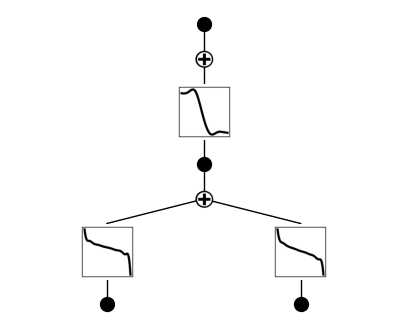

In [57]:
model.plot(beta = 10)

In [87]:
grids = np.array(list(range(2, 10)))
results = []
train_losses = []
test_losses = []
steps = 50
k = 3

model = KAN(width=[2,1,1], grid=grids[i], k=k, seed=42)
model.fit(dataset_3, opt="LBFGS", steps=steps)

for i in range(grids.shape[0]):
    model.refine(grids[i])
    results = model.fit(dataset_3, opt="LBFGS", steps=steps)
    train_losses.append(np.mean(results['train_loss']))
    test_losses.append(np.mean(results['test_loss']))

train loss: 4.12e-02 | test loss: 8.10e-02 | reg: 3.50e+00 : 100%|██| 50/50 [00:05<00:00,  8.90it/s]
train loss: 4.60e-02 | test loss: 9.29e-02 | reg: 3.24e+00 : 100%|██| 50/50 [00:05<00:00,  9.39it/s]
train loss: 5.11e-02 | test loss: 1.14e-01 | reg: 3.24e+00 : 100%|██| 50/50 [00:04<00:00, 12.45it/s]
train loss: 5.09e-02 | test loss: 1.12e-01 | reg: 3.24e+00 : 100%|██| 50/50 [00:02<00:00, 20.51it/s]
train loss: 5.11e-02 | test loss: 1.15e-01 | reg: 3.24e+00 : 100%|██| 50/50 [00:02<00:00, 19.01it/s]
train loss: 5.10e-02 | test loss: 1.12e-01 | reg: 3.24e+00 : 100%|██| 50/50 [00:02<00:00, 19.81it/s]
train loss: 5.09e-02 | test loss: 1.14e-01 | reg: 3.24e+00 : 100%|██| 50/50 [00:02<00:00, 17.41it/s]
train loss: 5.09e-02 | test loss: 1.14e-01 | reg: 3.24e+00 : 100%|██| 50/50 [00:01<00:00, 33.11it/s]
train loss: 5.09e-02 | test loss: 1.13e-01 | reg: 3.24e+00 : 100%|██| 50/50 [00:01<00:00, 29.03it/s]


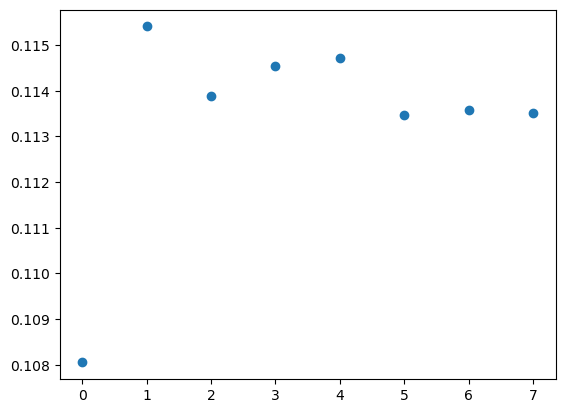

In [89]:
plt.scatter(list(range(len(test_losses))), test_losses)

In [90]:
data = zip(grids, test_losses)
# Step 1: Sort the list by the number of parameters
sorted_data = sorted(data, key=lambda x: x[0])

# Step 2: Identify the Pareto frontier
pareto_frontier = []
current_best_loss = float('inf')

for params, loss in sorted_data:
    if loss < current_best_loss:
        pareto_frontier.append((params, loss))
        current_best_loss = loss

# Step 3: Select the optimal point
# For this example, we will select the point with the lowest loss
optimal_point = min(pareto_frontier, key=lambda x: x[1])

# Display the Pareto frontier and the optimal point
print("Pareto Frontier:", pareto_frontier)
print("Optimal Point:", optimal_point)


Pareto Frontier: [(2, 0.10804878)]
Optimal Point: (2, 0.10804878)


In [122]:
## grid auto optimization
data = zip(grids, test_losses)
data = zip(
    list(range(100, 200, 10)),
    [10,9,8,4,2,1,0.99,0.98,0.97,0.96]
    )
# just consider points where the loss decreases
pareto_frontier = []
current_best_loss = float('inf')
for params, loss in data:
    if loss < current_best_loss:
        pareto_frontier.append((params, loss))
        current_best_loss = loss

# compute the slope between consecutive points
slopes = []
for i in range(1, len(pareto_frontier)):
    params_diff = pareto_frontier[i][0] - pareto_frontier[i-1][0]
    loss_diff = pareto_frontier[i-1][1] - pareto_frontier[i][1]
    slope = loss_diff / params_diff if params_diff != 0 else float('inf')
    slopes.append((slope, pareto_frontier[i]))

# take the point where the slope is higher than a threshold (we already selected 
# the points that are monotonically decreasing)
threshold = 1e-4

selected_point = pareto_frontier[0]

for slope, point in slopes:
    if slope > threshold:
        selected_point = point

print("Pareto frontier:", pareto_frontier)
print("Slopes and points:", slopes)
print("best grid:", selected_point)

Pareto frontier: [(100, 10), (110, 9), (120, 8), (130, 4), (140, 2), (150, 1), (160, 0.99), (170, 0.98), (180, 0.97), (190, 0.96)]
Slopes and points: [(0.1, (110, 9)), (0.1, (120, 8)), (0.4, (130, 4)), (0.2, (140, 2)), (0.1, (150, 1)), (0.0010000000000000009, (160, 0.99)), (0.0010000000000000009, (170, 0.98)), (0.0010000000000000009, (180, 0.97)), (0.0010000000000000009, (190, 0.96))]
best grid: (190, 0.96)
